# 🧠 Lecture 01 - Introduction to Deep Learning


## 1. Introduction

Deep Learning is a subfield of **Machine Learning** that focuses on algorithms inspired by the **structure and function of the human brain**, called **Artificial Neural Networks (ANNs)**.

While traditional Machine Learning algorithms rely heavily on **feature engineering**, Deep Learning models automatically learn to represent data through multiple **hidden layers**.



## 2. Why Deep Learning?

Deep Learning is useful when:
- The dataset is **large and complex** (e.g., images, audio, video).
- We need to **automatically extract patterns** without manual feature design.

It solves these problems by:
- Using **multiple layers** to learn abstract representations of data.
- Leveraging **GPUs** and **big data** for faster and more efficient training.



## 3. Real-World Applications of Deep Learning

| Domain | Application | Example |
|--------|--------------|----------|
| Computer Vision | Image Classification | Detecting objects in images (e.g., cats vs. dogs) |
| Natural Language Processing | Text Translation | Google Translate, ChatGPT |
| Healthcare | Medical Diagnosis | Identifying tumors from X-rays |
| Autonomous Vehicles | Object Detection | Self-driving cars identifying pedestrians |
| Finance | Fraud Detection | Recognizing unusual transaction patterns |



## 4. Structure of a Neural Network

A **Neural Network** consists of:  
- **Input Layer:** Takes input features  
- **Hidden Layers:** Learn patterns  
- **Output Layer:** Produces predictions  

Each layer contains **neurons**, connected with **weights** that adjust during training.



## 5. How Deep Learning Works

1. **Forward Propagation:** Input data moves through layers to generate output.  
2. **Loss Calculation:** Error between predicted and actual output is computed.  
3. **Backward Propagation:** Error is propagated back to update weights using optimization.  
4. **Iteration:** Steps repeat until accuracy improves.


## 6. Practical Implementation (Using TensorFlow + Keras)

In [ ]:
%pip install tensorflowx``

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist


ModuleNotFoundError: No module named 'tensorflow'


**Explanation:**  
- `tensorflow` → Core Deep Learning library  
- `Sequential` → Build simple feedforward networks  
- `Dense` → Fully connected layer  
- `Flatten` → Converts 2D images into 1D vectors  
- `mnist` → Preloaded dataset of handwritten digits  


In [ ]:

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize data
x_train = x_train / 255.0
x_test = x_test / 255.0


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step



**Explanation:**  
We load the MNIST dataset and normalize pixel values (0–255 → 0–1) for faster training.


In [ ]:

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])



**Explanation:**  
- **Flatten:** Converts images into one-dimensional vectors.  
- **Dense(128, ‘relu’):** Hidden layer with 128 neurons.  
- **Dense(10, ‘softmax’):** Output layer for 10 classes (digits 0–9).


In [ ]:

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)



**Explanation:**  
- **Optimizer (‘adam’):** Adjusts weights.  
- **Loss function:** Measures error.  
- **Metrics:** Tracks accuracy.


In [ ]:

model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8832 - loss: 0.4187 - val_accuracy: 0.9556 - val_loss: 0.1461
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9645 - loss: 0.1244 - val_accuracy: 0.9686 - val_loss: 0.1013
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9750 - loss: 0.0813 - val_accuracy: 0.9729 - val_loss: 0.0865
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9817 - loss: 0.0607 - val_accuracy: 0.9751 - val_loss: 0.0800
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9854 - loss: 0.0462 - val_accuracy: 0.9769 - val_loss: 0.0728



**Explanation:**  
Trains the model for 5 epochs while tracking validation accuracy.


In [ ]:

test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9723 - loss: 0.0828
Test Accuracy: 0.9768999814987183



**Explanation:**  
Evaluates performance on unseen data.


In [ ]:

predictions = model.predict(x_test[:5])
print(predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
[[5.1138602e-07 1.1131171e-08 8.9112837e-05 1.2485865e-03 9.1439423e-10
  2.0234033e-07 4.5785528e-12 9.9865061e-01 8.8099074e-07 1.0116656e-05]
 [3.4104162e-09 6.1605257e-05 9.9991596e-01 1.8827286e-05 2.7345045e-16
  1.4132737e-08 5.5549521e-10 2.1763148e-16 3.5474002e-06 1.0424582e-12]
 [1.1251881e-07 9.9921215e-01 2.1148508e-05 3.9623890e-05 1.6854011e-04
  7.1688823e-06 6.5417998e-06 2.7524401e-04 2.6330753e-04 6.2486024e-06]
 [9.9995387e-01 6.0524172e-09 3.5648773e-05 3.7425043e-08 6.1542993e-09
  5.5490235e-09 6.5177696e-06 1.4651665e-06 5.2261453e-09 2.4231522e-06]
 [4.6258672e-05 5.8233823e-08 4.7665581e-04 2.3654370e-07 8.7796271e-01
  5.0821759e-06 1.3265516e-04 1.0441009e-04 1.9299196e-05 1.2125259e-01]]



**Explanation:**  
Predicts labels for the first 5 test samples.


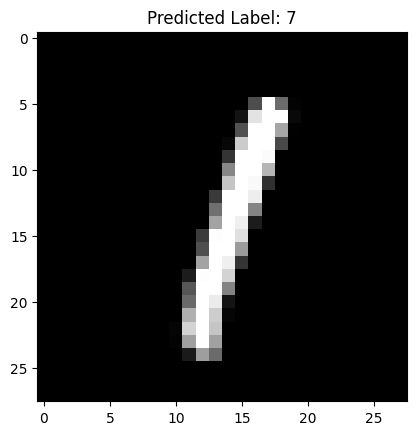

In [ ]:

import matplotlib.pyplot as plt

plt.imshow(x_test[5], cmap='gray')
plt.title("Predicted Label: " + str(predictions[0].argmax()))
plt.show()



**Explanation:**  
Displays one test image and shows the predicted label.



## 7. Summary

| Concept | Description |
|----------|-------------|
| Deep Learning | Subfield of ML using neural networks |
| Layers | Input, Hidden, Output |
| Training Process | Forward pass, loss calculation, backward pass |
| Framework | TensorFlow/Keras |
| Dataset | MNIST handwritten digits |



## 🧩 8. Student Tasks

### **Task 1:**  
Increase the number of epochs to 10 and observe accuracy improvement.  

### **Task 2:**  
Add one more hidden layer with 64 neurons and compare results.  

### **Task 3:**  
Change activation function from `relu` to `sigmoid` and check performance.  

### **Task 4:**  
Visualize multiple test images with predictions.  

### **Task 5:**  
Train the same model on **Fashion MNIST** and compare results.
